Problem 0 - Import the data and declare your package dependencies.

In [39]:
#Dependencies
import pandas as pd
import numpy as np
from plotnine import *

In [40]:
avocados = pd.read_csv("C:\\Users\\sjacob17\\OneDrive\\Documents\\Cal Poly MSBA\\GSB544_MachineLearning\\Labs\\avocado-updated-2020.csv.zip")

Problem 1 - Briefly describe the data set. What information does it contain?

The avocado dataset from Kaggle contains detailed information on avocado prices and sales volume in different parts of the United States from January 4th 2015 to May 17th 2020. This data set includes columns such as the date, average price, total sales of small, large, and extra-large avocadoes, total number of avocado bags sold, the type of avocado, where in the US the data was collected, and when the data was collected. 

Problem 2 - Clean the data in any way you see fit.

In [41]:
avocados['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico'], dtype=object)

In [238]:
avocados = avocados.rename(columns={
    '4046': 'small_avocados',
    '4225': 'large_avocados',
    '4770': 'xl_avocados',
    'Total Volume': 'total_avocado_volume',
    'Total Bags': 'total_bags',
    'geography': 'region'
})

In [239]:
#Used ChatGPT to help create new categories for cities, metro regions, major regions, and total US. 
#Used ChatGPT to create a new dataframe for the major and metro regions. 

cities = [
    "Albany",
    "Atlanta"
    "Boise",
    "Boston",
    "Buffalo/Rochester"
    "Charlotte",
    "Chicago"
    "Columbus",
    "Denver",
    "Detroit",
    "Grand Rapids",
    "Hartford/Springfield",
    "Houston",
    "Indianapolis",
    "Jacksonville",
    "Las Vegas",
    "Los Angeles"
    "Nashville",
    "New York",
    "Orlando",
    "Philadelphia",
    "Phoenix/Tucson",
    "Pittsburgh",
    "Portland",
    "Raleigh/Greensboro",
    "Richmond/Norfolk",
    "Roanoke",
    "Sacramento",
    "San Diego",
    "San Francisco",
    "Seattle",
    "Spokane",
    "St. Louis",
    "Syracuse", "Tampa"
]

metro_regions = [
    "Baltimore/Washington",
    "Louisville",
    "New Orleans/Mobile"
    "Cincinnati/Dayton",
    "Dallas/Ft. Worth",
    "Miami/Ft. Lauderdale",
    "Harrisburg/Scranton",
    "Tampa",
    "Philadelphia"
]

major_regions = [
    "California",
    "Great Lakes",
    "Midsouth",
    "Northern New England",
    "South Carolina",
    "West",
    "Southeast",
    "Northeast",
    "South Central",
    "Plains",
    "West Tex/New Mexico"
]

total_us = [
    "Total U.S."
]

cities_df = avocados[avocados['region'].isin(cities)]
major_regions_df = avocados[avocados['region'].isin(major_regions)]
metro_regions_df = avocados[avocados['region'].isin(metro_regions)]



Problem 3 - Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [240]:
df_2017_organic = major_regions_df[(major_regions_df['year'] == 2017) & (major_regions_df['type'] == 'organic')]
df_2017_organic.groupby('region')['small_avocados'].sum().sort_values(ascending=False)


region
West                   1870206.29
South Central          1717104.19
California             1526290.58
Northeast               925832.36
Southeast               285124.34
Great Lakes             202487.68
Midsouth                186395.50
Plains                  168583.40
West Tex/New Mexico     110910.95
South Carolina           18494.05
Northern New England      1249.48
Name: small_avocados, dtype: float64

West is the major geographical region that sold the most small avocados in 2017 with a total of 1870206.29 small avocados sold. 

Problem 4 - Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [241]:
#Use ChatGPT to convert the date column into three seperate columns for year, month, and day
avocados['date'] = pd.to_datetime(avocados['date'], format='%Y-%m-%d')

avocados['year'] = avocados['date'].dt.year
avocados['month'] = avocados['date'].dt.month
avocados['day'] = avocados['date'].dt.day

In [242]:
#Convert values from scientific notation to standard decimal notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [243]:
# Filter avocados dataset for the year 2017 and organic avocados
average_volume_by_month = avocados.groupby('month')['total_volume'].mean().sort_values(ascending=False)
average_volume_by_month

month
5    1123632.25
2    1095373.83
6    1051246.57
4    1016581.69
3     995715.04
1     985312.16
7     983268.10
8     949924.93
9     906477.26
10    844686.29
11    822347.02
12    807669.47
Name: total_volume, dtype: float64

May (month #5) was the month with the highest average volume of avocado sales at 1123632.25

Problem 5 - Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [244]:
pd.DataFrame(metro_regions_df.groupby(['region'])['total_volume'].sum().sort_values(ascending=False)).head(5).index

Index(['Dallas/Ft. Worth', 'Baltimore/Washington', 'Miami/Ft. Lauderdale',
       'Philadelphia', 'Tampa'],
      dtype='object', name='region')

Dallas/Ft.Worth is the metro area that sold the most avocados.

In [245]:
top5 = pd.DataFrame(metro_regions_df.groupby(['region'])['total_volume'].mean().sort_values(ascending=False)).head(5).index

df_top5 = metro_regions_df[metro_regions_df['region'].isin(top5)]

#df_top5
#top5

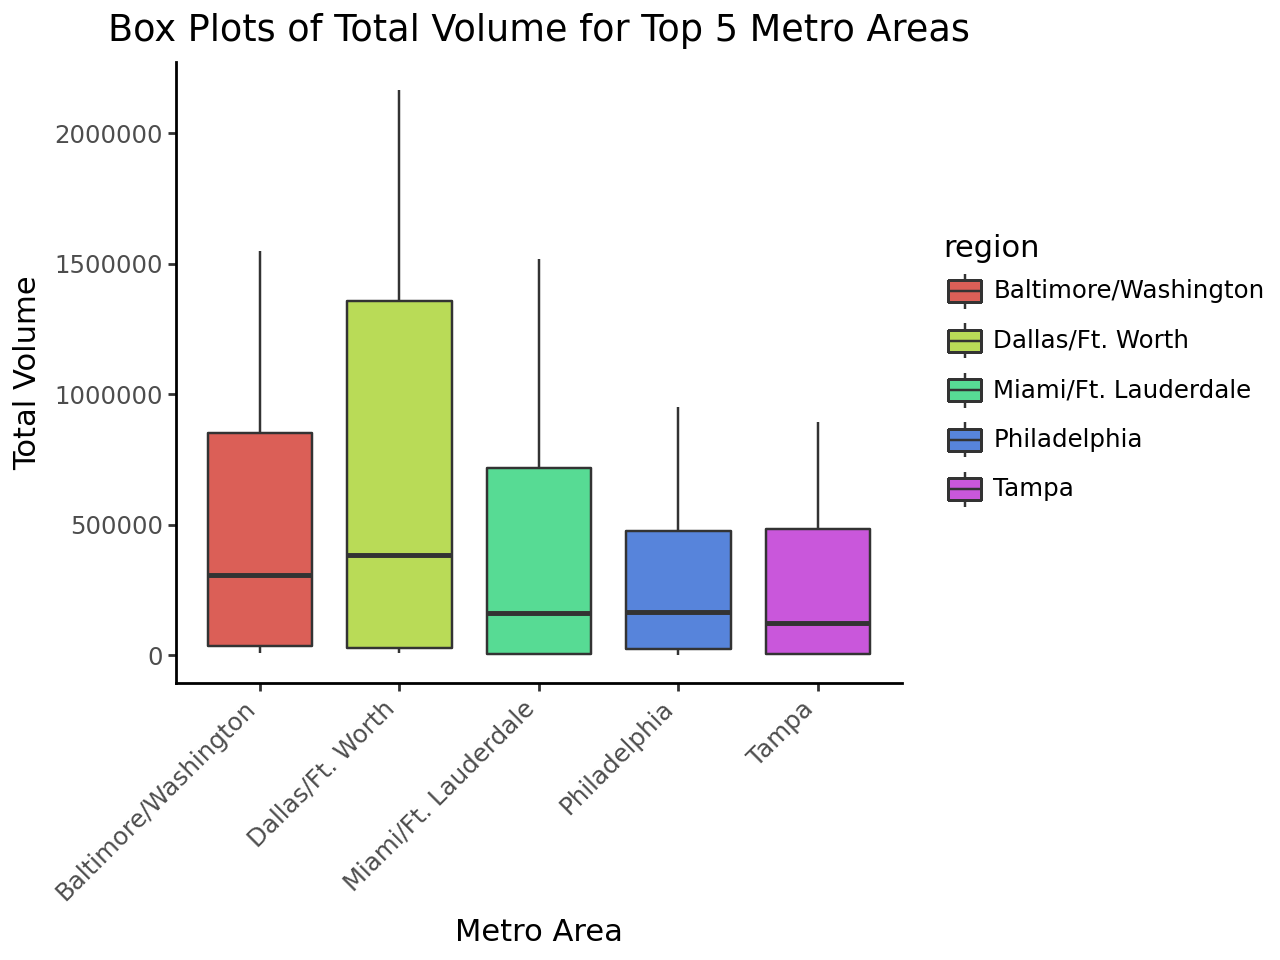

In [254]:
#Used ChatGPT to help me create the box plots and figure out how to adjust the labels on the x-axis so they were slanted. 

(ggplot(df_top5, aes(x = "region", y = "total_volume", fill = 'region'))
+ geom_boxplot()
+ labs(title='Box Plots of Total Volume for Top 5 Metro Areas', x='Metro Area', y='Total Volume')
+ theme_classic()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) )


Problem 6 - From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [255]:
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Used ChatGPT to help me filter the original avocados dataset to only have rows with the four California regions
california_df = avocados[avocados['region'].isin(california_regions)]

Problem 7 - In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [256]:
#Used ChatGPT to help me figure out how to find the difference in price of organic and conventional avocados.
average_price = california_df[['region', 'type', 'average_price']].groupby(['region', 'type']).mean().unstack(level=-1)
average_price['difference']= average_price[('average_price', 'organic')] - average_price[('average_price', 'conventional')]
average_price = average_price.reset_index().droplevel(1, axis = 1)
average_price.columns = ['region', 'avg_price_con', 'avg_price_org', 'difference']
average_price


,region,avg_price_con,avg_price_org,difference
0,Los Angeles,1.05,1.57,0.53
1,Sacramento,1.30,1.87,0.58
2,San Diego,1.11,1.80,0.68
3,San Francisco,1.40,2.12,0.72


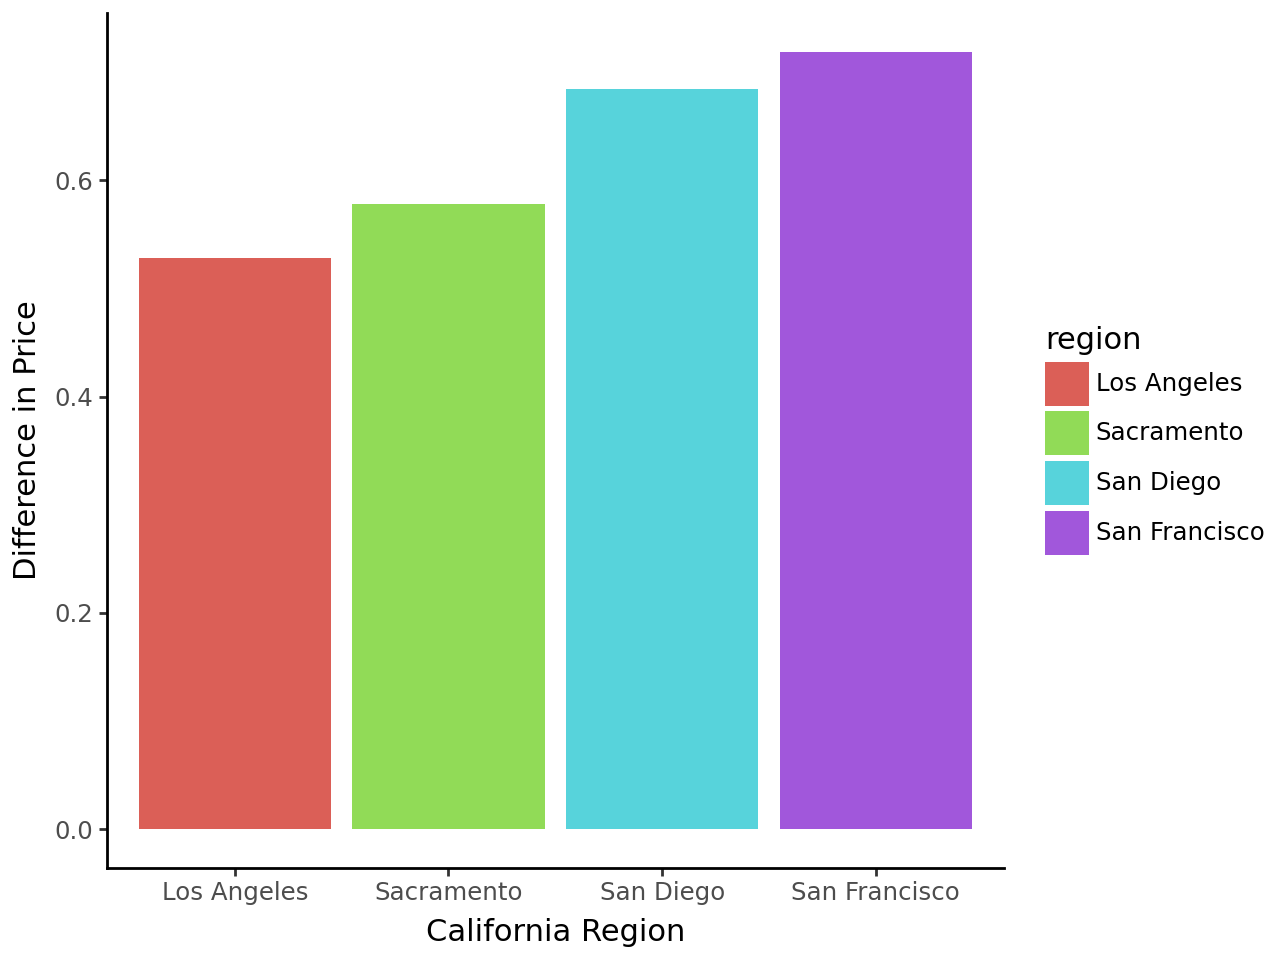

In [257]:
(ggplot(average_price, aes(x = 'region', y = 'difference', fill = 'region'))
+ geom_bar(stat = 'identity')
+ xlab("California Region")
+ ylab('Difference in Price')
+ theme_classic()
)

The San Francisco region has the largest price difference between organic and conventional avocados. 

Problem 8 - Recreate the plot, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. 

In [258]:
#Used ChatGPT to filter the California dataset, to help create the proportion column, to melt and change the format of the recreate_graph dataset, 
    #to merge the recreate_graph and total_avocados datasets, and to change the order of the avocado sizes. 
recreate_graph = california_df[['region', 'type', 'small_avocados', 'large_avocados', 'xl_avocados']]
recreate_graph = recreate_graph.groupby(['region', 'type']).sum()
recreate_graph = recreate_graph.reset_index()
recreate_graph = recreate_graph.melt(id_vars= ['region', 'type'], var_name= 'size', value_name= 'sum')

total_avocados = recreate_graph.groupby(['region', 'type']) ['sum'].sum().reset_index()
total_avocados = total_avocados.rename(columns={'sum': 'total'})

recreate_graph = pd.merge(recreate_graph, total_avocados, on = ['region', 'type'])
recreate_graph['proportion'] = (recreate_graph['sum'] / recreate_graph['total'])*100

recreate_graph['size'] = pd.Categorical(recreate_graph['size'], categories=['xl_avocados', 'large_avocados', 'small_avocados'], ordered=True)


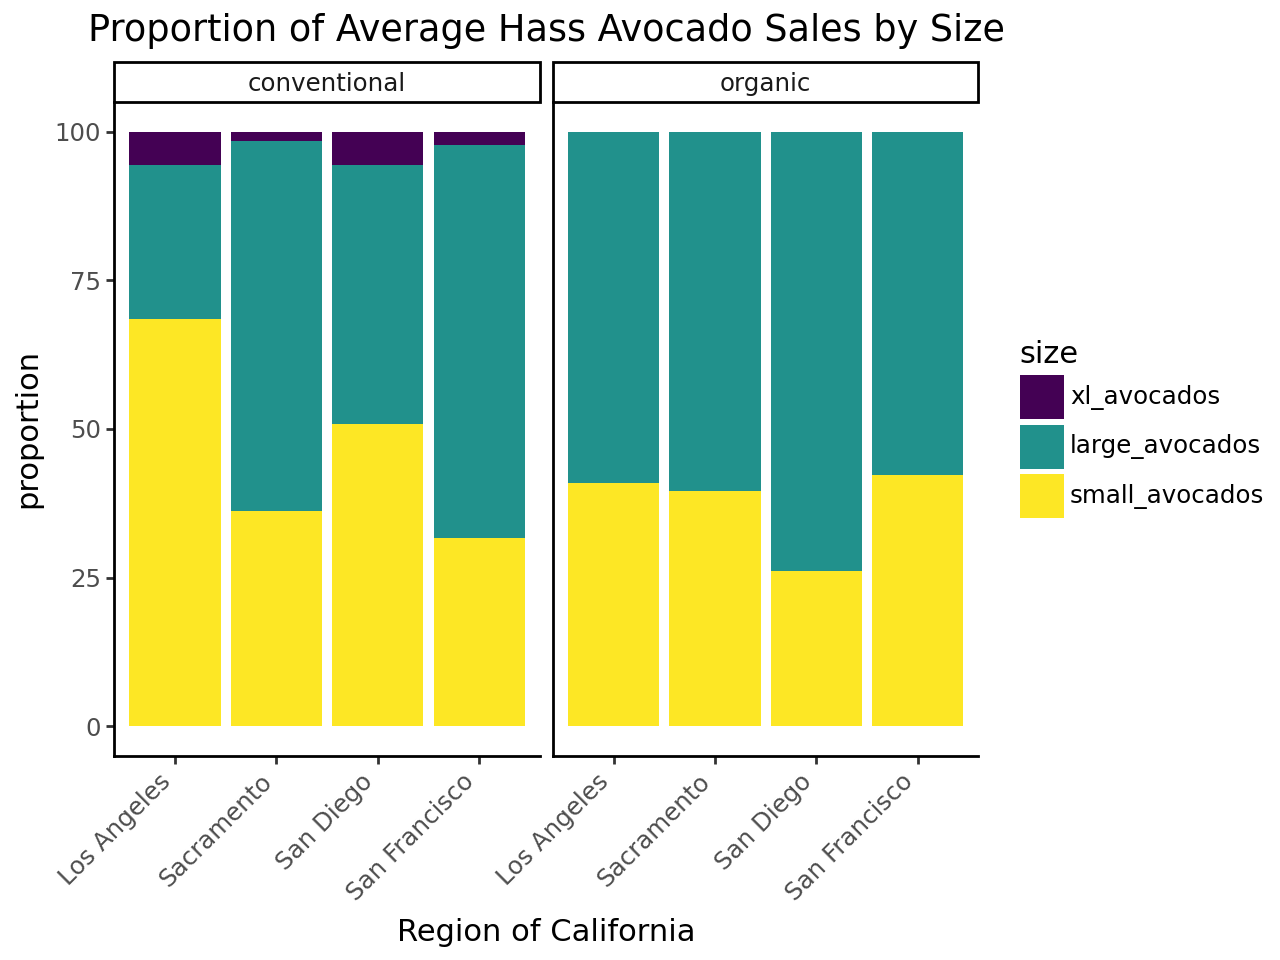

In [259]:
#Used ChatGPT to help me create the bar plots and figure out how to adjust the labels on the x-axis so they were slanted. 
(ggplot(recreate_graph, aes(x = 'region', y = 'proportion', fill = 'size'))
+geom_bar(stat = 'identity')
+facet_wrap('type')
+labs(title="Proportion of Average Hass Avocado Sales by Size", x="Region of California", y='proportion')
+ theme_classic()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) 
) 

USING OUTSIDE DATA PROBLEM

In [260]:
filtered_california_df = pd.DataFrame(california_df.groupby(['region', 'year'])['total_volume'].mean()).reset_index()

In [261]:
#Used ChatGPT to look up data on average house prices per year in each of the four California regions. 
data = {
    "year": [2015, 2016, 2017, 2018, 2019, 2020],
    "Los Angeles": [502750, 522520, 577690, 588140, 641340, 660000],
    "Sacramento": [278000, 300000, 336000, 364000, 395000, 430000],
    "San Diego": [530000, 568000, 605000, 618500, 655000, 730000],
    "San Francisco": [1175000, 1170000, 1200000, 1300000, 1400000, 1500000]
}

#Data Sources:
#https://www.laalmanac.com/economy/ec37.php (Los Angeles and San Diego data)
#https://dqydj.com/historical-home-prices/ (San Francisco and Sacramento)

df = pd.DataFrame(data)

In [262]:
# Used ChatGPT to help change the format of the dataframe from wide to long using pd.melt()
long_df = pd.melt(df, id_vars=["year"], var_name="region", value_name="avg_house_price")

In [263]:
#Used ChatGPT to help combine the dataframes
combined_data_df = filtered_california_df.merge(long_df, on=[ 'year','region'], how='inner')

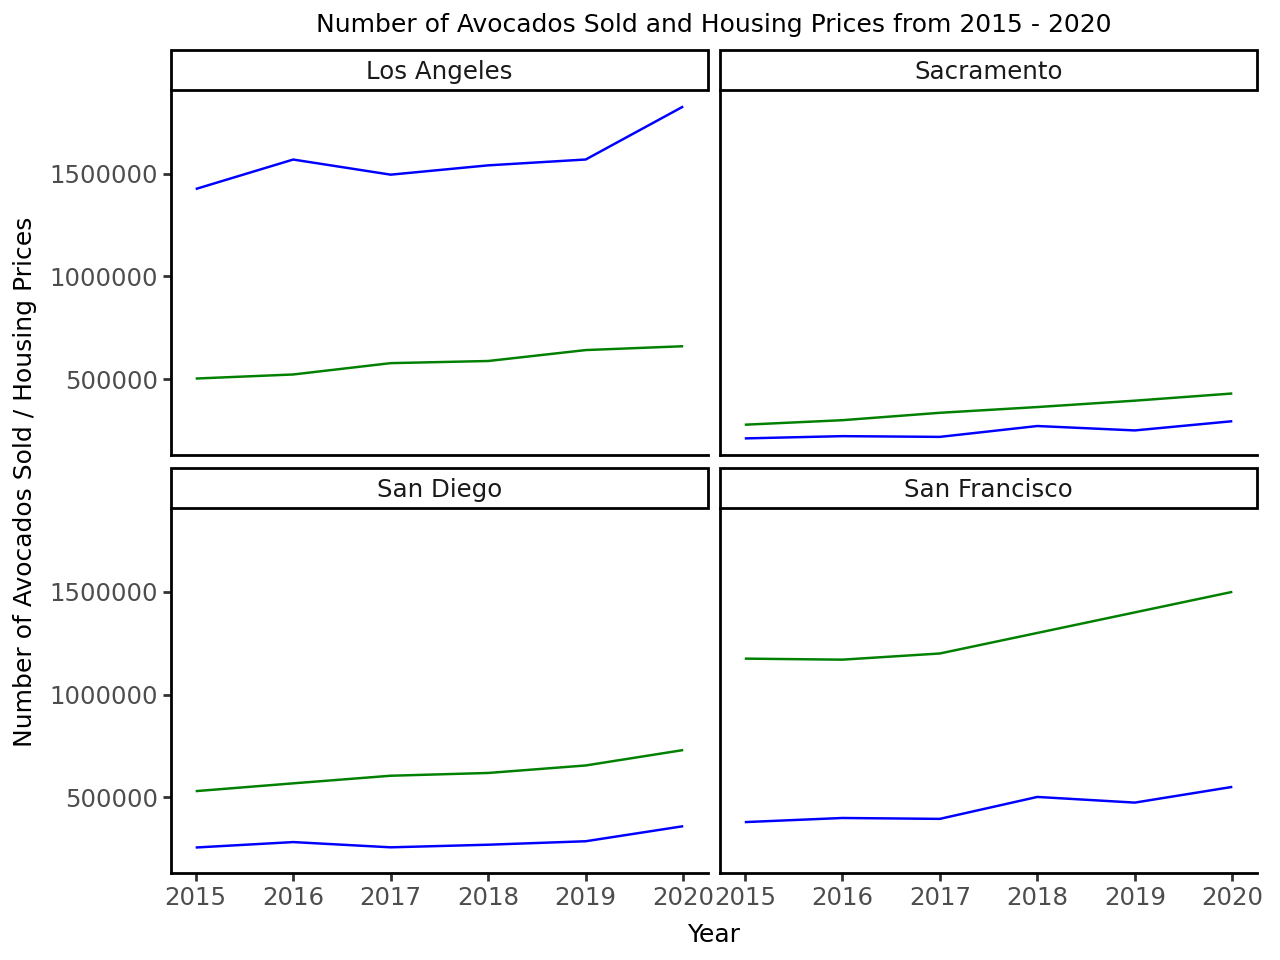

In [264]:
#Used ChatGPT to help create green and blue lines and to help create a line plot with 2 different lines. 
(ggplot(combined_data_df, aes(x = 'year'))
+ geom_line(aes(y='avg_house_price'), color = 'green')
+ geom_line(aes(y='total_volume'), color = 'blue')
+ facet_wrap('region')
+ theme(axis_title_y = element_blank())
+ labs(title="Number of Avocados Sold and Housing Prices from 2015 - 2020", x="Year", y='Number of Avocados Sold / Housing Prices')
+ theme_classic()
+ theme(title=element_text(size=9))
)

In the above visualization, housing costs are analyzed in four specific California regions over six years and are compared to the number of avocados sold each year. In each plot, one can see the number of avocados purchased in one of the four California regions from 2015 to 2020. However, as displayed on each of the four plots, each region has a different correlation between housing costs and the number of avocados sold. There is a claim circulating in the media, that millenials cannot afford houses due to poor spending habits purchasing avocados. This visualisation does not support this claim as there is no correlation betweeen avocado sales and housing costs. 
